In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [48]:
# read csv file 
df=pd.read_csv("insurance.csv")
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [79]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [49]:
# Check if we have missing value
Counter(pd.isnull(df).any(axis=1))

Counter({False: 1338})

In [50]:
df = df[pd.notnull(df).any(axis=1)]
train = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']

In [64]:
import turicreate as tc

# Load the data
data =  tc.SFrame('insurance.csv')

# Make a train-test split
train_data, test_data = data.random_split(0.8)

# Automatically picks the right model based on your data.
model = tc..create(train_data, target='charges',
                                    features = ['age',
                                                'sex',
                                                'bmi',
                                                'children', 
                                                'smoker', 
                                                'region'],validation_set=None)

Finished parsing file /Users/changsun/pgAdmin/jupyter/MLWorkshop/insurance.csv

Parsing completed. Parsed 100 lines in 0.025244 secs.

------------------------------------------------------

Inferred types from first 100 line(s) of file as 

column_type_hints=[int,str,float,int,str,str,float]

If parsing fails due to incorrect types, you can correct

the inferred type list above and pass it to read_csv in

the column_type_hints argument

------------------------------------------------------


Finished parsing file /Users/changsun/pgAdmin/jupyter/MLWorkshop/insurance.csv

Parsing completed. Parsed 1338 lines in 0.009873 secs.

Linear regression:

--------------------------------------------------------

Number of examples          : 1062

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 9

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.002105     | 30492.539155       | 6156.127195   |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [62]:
model

Class                          : BoostedTreesRegression



Schema

------

Number of examples             : 1002

Number of feature columns      : 6

Number of unpacked features    : 6



Settings

--------

Number of trees                : 10

Max tree depth                 : 6

Training time (sec)            : 0.0346

Training rmse                  : 3295.1997

Validation rmse                : 6612.6772

Training max_error             : 20140.0586

Validation max_error           : 25240.8047

In [ ]:
# Save predictions to an SArray
predictions = model.predict(test_data)

# Evaluate the model and save the results into a dictionary
results = model.evaluate(test_data)

In [77]:
plt.scatter(df['age'], df['charges'], marker='o', c=t, s=30, edgecolor='k')

In [76]:
t=[]
for i in df['smoker']:
    if i == 'yes':
        t.append(1)
    elif i == 'no':
        t.append(0)

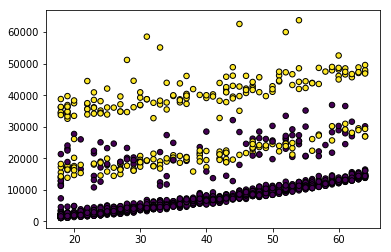

In [78]:
plt.show()